# Probability Assignment

To get full credit in this assignment you need to use only `numpy` or `jax` libraries  and include adequate explanation of the code in either markdown cells or code comments. Sometimes you need to type equations - type equations in latex math notation. 

PS: Please note that we run through chatGPT the questions and you will be referred to the Dean if we find that a robot answered your questions. .

## Question 1a (10 points)

In a private subreddit people are posting their opinions on the CEO of the company you work for. Lets assume that the employees that are posting are random logging in to that subreddit and that each post indicates whether the employee approves or not the job that the CEO is doing. Let $x_i$ be the binary random variable where $x_i=1$ indicates approval. You can assume that $x$ is distributed according to a Bernoulli distribution with parameter $p=1/2$.

Your job is to sample $n=50$ posts and estimate the approval rate of the CEO by considering the statistics of $y=x_1+x_2+ \dots + x_n$. What is the probability that 25 employees approve the CEO?

## Question 1b (10 points)

Following your findings in Q1a, read about the [Cenral Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) and recognize that 

$$z=\frac{y-\mu_y}{\sigma_y}$$ 

is normally distributed with mean 0 and variance 1.

Can you find the  probability that 25 employees approve the CEO using the Gaussian approximation?


 a)
The probability that 25 employees approve the CEO is given by a binomial probability $P_x$, where $$P_x = \binom {50}{25} * 0.5^{25} * (1-0.5)^{25} =  0.112 $$.


b) 
Yes, I can find the probablity because $n = 50 >= 30$, which means that the sample size is large enough for the Central Limit Theorem to hold. The probablity is $ P_x (x <= 25) - P_x (x <= 24) $.
Since $𝜇_x = E(X) = 50 * 0.5 = 25, 𝜎_y = 12.5^\frac{1}{2} = 3.536$.
Therefore, $ P_x (x <= 25) - P_x (x <= 24) = P_x (z <= \frac{25-25}{3.536}) - P_x (z <= \frac{24-25}{3.536}) = P_x (z<=0) - P_x(z <= -0.283) = 0.5 - 0.389 = 0.111 $.
The probablity calculated using Guassian approximation is $p_x = 0.111$.

## Question 2 (20 points)

A sequential experiment involves repeatedly drawing a ball from one of the two urns, noting the number on the ball and replacing the ball in the urn. Urn 0 contains a ball with the number 0 and two balls with the number 1. Urn 1 contains five balls with the number 0 and one ball with the number 1. 

The urn from which the first ball is drawn is selected by flipping a fair coin. Urn 0 is used if the outcome is H and urn 1 is used if the outcome is T. **The urn used in a subsequent draws corresponds to the number on the ball drawn in the previous draw.** 

What is the probability of a specific sequence of the numbers on drawn balls being 0011 ? 

Since the number on a ball drawn determines the urn in which the next ball would be drawn, the urn that we start with determines the probability of having the design series.
The probablity of drawing $0$ from urn 0 is $p_1 = \frac{1}{3}$ and that of drawing $1$ from urn 0 is $p_2 = \frac{2}{3}$.
The probablity of drawing $0$ from urn 1 is $p_3 = \frac{5}{6}$ and that of drawing $1$ from urn 0 is $p_4 = \frac{1}{6}$. 
If urn to start with drawn is $0$, $p_s$,the probablity of drawing the sequence $0011$, is $p_a = p_1 * p_1 * p_2 * p_4 = \frac{1}{3} * \frac{1}{3} * \frac{2}{3} * \frac{1}{6} = \frac{1}{81}$. 
If urn to start with drawn is $1$, then, $p_b = p_3 * p_1 * p_2 * p_4 = \frac{5}{6} * \frac{1}{3} * \frac{2}{3} * \frac{1}{6} = \frac{5}{162}$. 
Since the coin is fair, then the probablity of drawing $0 =$ the probablity of drawing $1 = 1/2$. 
Therefore, $p = \frac{1}{2}*\frac{1}{81} + \frac{1}{2} * \frac{5}{162} = \frac{1}{162} + \frac{5}{324} = \frac{7}{324}$.

## Question 3 (20 points) 

Referring to Example 6.6 of the  [Math for ML book](https://mml-book.github.io/book/mml-book.pdf), simulate and plot the bivariate normal distribution with the shown parameters using the [Cholesky factorization](https://numpy.org/doc/stable/reference/generated/numpy.linalg.cholesky.html) for the simulation. 


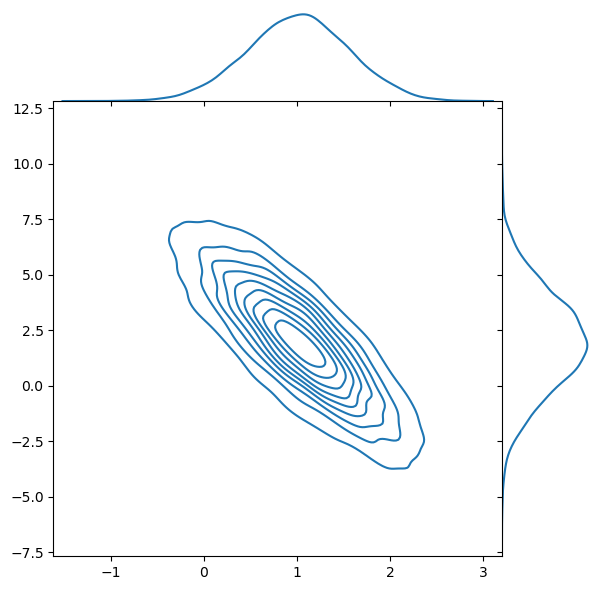

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#dimension
d = 2 

#mean vector
m = np.array([1, 2]).reshape(2,1)

#covariance function
K0 = np.array([[0.3, -1],
             [-1, 5]])

#add a small multiple of the identity matrix I in cause the eigenvalues of the matrix K0 decay very rapidly
epsilon = 0.0001

K = K0 + epsilon*np.identity(d)

L = np.linalg.cholesky(K)

#independent samples
n = 5000

u = np.random.normal(loc=0, scale=1,size=d*n).reshape(d,n)

x = m + np.dot(L, u)

sns.jointplot(x=x[0], y =x[1], kind = "kde", space=0);

## Question 4 (20 points)

Go through the provided links on [Poisson](https://dlsun.github.io/probability/poisson.html) and [exponential distributions](https://dlsun.github.io/probability/exponential.html) as the `Math for ML` textbook in your course site  is not covering enough these important distributions.

Watch this video https://www.youtube.com/watch?v=Asto3RS46ks where the author is explaining how to simulate a Poisson distribution from scratch. 

1. Using the Kaggle API download [this dataset](https://www.kaggle.com/datasets/new-york-city/nyc-east-river-bicycle-crossings) and plot the histogram of the number of cyclists that cross the Brooklyn bridge per day.  
2. Simulate the number of cyclists that cross the Brooklyn bridge per day using the Poisson distribution. Ensure that the simulated counts are similar distribution-wise to the observed counts.


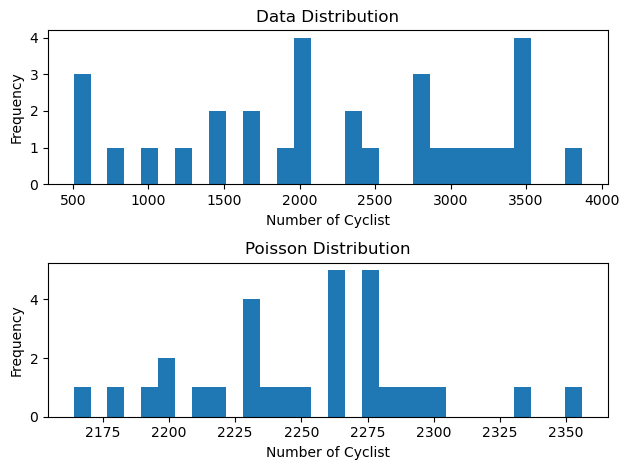

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Part 1

#read data from Panda
#the data is repeated, so only the first 30 rows (and the header) of data is read.
data = pd.read_csv('/Users/waynewang/Downloads/nyc-east-river-bicycle-counts.csv', usecols = ['Brooklyn Bridge'], nrows = 31)
mean = data.mean()
arryData = np.array(data.values.tolist())

#need two diagrams in this section
#so set up subplots for two diagrams
fig, (ax0, ax1) = plt.subplots(nrows =2)

#set the first diagram with arryData
ax0.hist(arryData, bins = 30, label = 'Data' )
ax0.set_ylabel('Frequency')
ax0.set_xlabel('Number of Cyclist')
ax0.set_title('Data Distribution')

#Part 2
#function to make random poisson sampel
#only works when lam is small
#or "integer division result too large for a float" is raised
def possionSample(lam):
    el, n, u = np.exp(-lam), 0, np.random.uniform(0,1)
    pp, factorial, power = el, 1, 1
    while u > pp:
        n = n + 1
        factorial, power = n * factorial, lam*power
        pp = pp + (power/factorial)*el
        print(pp)
    return n

#attempt to use the following the code, 
#but if the lambda approaches the actual value from the data, an "integer division result too large for a float" error is raised
# the error occurs at line: pp = pp + (power/factorial)*el

'''
list_distribution = []
lamda = mean; #
for i in range(29):
    temp = possionSample(lamda)
    list_distribution.append(temp)

print(list_distribution)

plt.hist(listBridge, 30)
plt.ylabel('Frequency')
plt.xlabel('Number of Cyclist')

'''
# use numpy.random.poisson instead

arryPoisson = np.random.poisson(mean, 30)
ax1.hist(arryPoisson, bins = 30, rwidth = 1000, label = 'Poisson')
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Number of Cyclist')
ax1.set_title('Poisson Distribution')


fig.tight_layout()
plt.show()

        










# Question 5 (20 points)

You are asked to stress test an cloud API endpoint and are told that the API exposes a database server that can be abstracted as an M/M/1 queue. Go through [this introductory](https://queue-it.com/blog/queuing-theory/) page to just understand the queuing domain and the notation M/M/1. Go also through the elements of the MM1 queue [here](https://en.wikipedia.org/wiki/M/M/1_queue). Make sure you click on the links and learn about the random process called Poisson process. 


Your task is to simulate the behavior of the queue and plot the number of requests that are waiting in the queue as a function of time. You are given three arrival rates of the API requests $\lambda=[1, 3, 4]$ and the service time of the requests as an exponential random variable with rate $\mu=4$. 

   

In [22]:
# Type the Python code here and ensure you save the notebook with the results of the code execution.

In [45]:

import numpy as np
from queue import Queue

#given an arrival rate and a service rate
#simulate an mm1 queue
def mm1(arrivalRate,serviceRate=4):

    queue = Queue()

    # Compute time of next arrival.
    nextArrival = np.random.poisson(arrivalRate)

    # Compute time of next completed service.
    nextService = nextArrival + np.random.exponential(scale=1/serviceRate) 
    
    simTime = 1000
    n = 0

    numRequests = []
    # Simulate the M/M/1 queue.
    while n < 1000:
        # if next job arrives before the next service is available
        while nextArrival < nextService:
            #enqueue the arrival
            queue.put(nextArrival)
            nextArrival += np.random.poisson(arrivalRate)

        # a service is completed completion.
        arrival = queue.get()
        wait = nextService - arrival


        # if the queue is empty, the next arrival time + service time is the nextService time
        if queue.qsize()==0:
            nextService = nextArrival + np.random.exponential(scale=1/serviceRate)
        else:
        #if the queue is not empty, the next service time is the current service time + next service time
            nextService = nextService + np.random.exponential(scale=1/serviceRate)
        #record the number of service in queue right now
        numRequests.append(queue.qsize())
        n += 1
    return numRequests

arrayRequests = np.array(mm1(1,4))


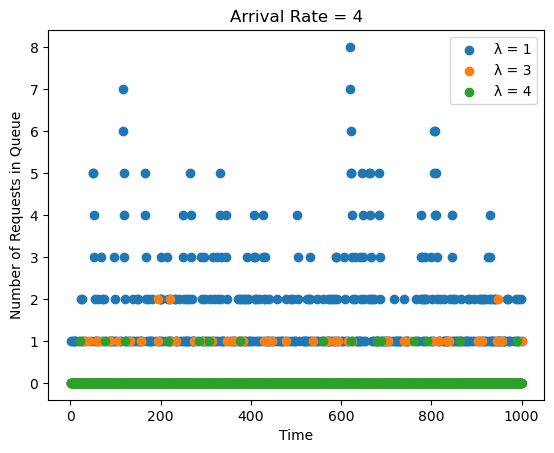

In [48]:
arrivalRates = [1,3,4]
for i in range(len(arrivalRates)):
    plt.scatter(np.array([i for i in range(1,1001)]), mm1(arrivalRates[i],4),label=f'λ = {arrivalRates[i]}')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Number of Requests in Queue')
plt.title('Arrival Rate = 4')
plt.show()